<a href="https://colab.research.google.com/github/asterynnn/GoogleColab/blob/main/ThumbsUp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-----------
Imports
-----------

In [ ]:
!sudo apt-get install msttcorefonts

In [ ]:
! pip uninstall -qq matplotlib
! pip install -qq matplotlib==1.5.3
! pip uninstall -qq matplotlib
! pip install -qq matplotlib==3.2.2

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

In [ ]:
import pandas as pd
import urllib.request
from PIL import Image
import os
# import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
# from sklearn import metrics, preprocessing
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import r2_score, mean_squared_error
# from sklearn.feature_selection import mutual_info_classif
# from sklearn.linear_model import LogisticRegression
from google.colab import files

# !wget https://github.com/nickhass3/youtube-analytics/raw/main/data/Aggregated_Metrics_By_Country_And_Subscriber_Status.csv
# !wget https://raw.githubusercontent.com/nickhass3/youtube-analytics/main/data/Aggregated_Metrics_By_Video.csv
# !wget https://github.com/nickhass3/youtube-analytics/raw/main/data/All_Comments_Final.csv
# !wget https://github.com/nickhass3/youtube-analytics/raw/main/data/Video_Performance_Over_Time.csv



In [ ]:
!wget https://raw.githubusercontent.com/NathanJackyLee/ML/main/ThumbsUp_Base_Dataset.csv
RAW = pd.read_csv("/content/ThumbsUp_Base_Dataset.csv")

In [ ]:
!wget https://raw.githubusercontent.com/NathanJackyLee/ML/main/TmbFilesize.csv
!wget https://raw.githubusercontent.com/NathanJackyLee/ML/main/TitleSentiment.csv
!wget https://raw.githubusercontent.com/NathanJackyLee/ML/main/OCRData.csv
!wget https://raw.githubusercontent.com/NathanJackyLee/ML/main/FacialData.csv

In [ ]:
id = RAW['vidid']

In [ ]:
TFS = pd.read_csv('TmbFilesize.csv')
TSN = pd.read_csv('TitleSentiment.csv')
OCR = pd.read_csv('OCRData.csv')
FAC = pd.read_csv('FacialData.csv')

In [ ]:
FAC = FAC.drop(columns=['Unnamed: 0'])
FAC['vidid'] = id

In [ ]:
FAC.to_csv('FacialData.csv', encoding = 'utf-8-sig')
files.download('FacialData.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
TFS = TFS.drop(columns=['Unnamed: 0'])
TFS['vidid'] = id

In [ ]:
TFS.to_csv('TmbFilesize.csv', encoding = 'utf-8-sig')
files.download('TmbFilesize.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
OCR['tmb_text'] = OCR['tmb_text'].astype(str)

ocrleg = []
for txt in OCR['tmb_text']:
  if txt == 'nan':
    ocrleg.append(0)
  else:
    ocrleg.append(len(txt))

OCR['text_length'] = ocrleg


In [ ]:
RAW['title'] = RAW['title'].astype(str)
titleg = []
for txt in RAW['title']:
  if txt == 'nan':
    titleg.append(0)
  else:
    titleg.append(len(txt))

In [ ]:
tneg = TSN['negative'].astype(float)
tpos = TSN['positive'].astype(float)
mneg = OCR['negative'].astype(float)
mpos = OCR['positive'].astype(float)

comsen = []
for i in range(len(tneg)):
  comsen.append((tpos[i] + mpos[i] - tneg[i] - mneg[i]) /2)

In [ ]:
comsen

In [ ]:
TEXAS = pd.DataFrame()
TEXAS['vidid'] = id
TEXAS['title_text'] = RAW['title']
TEXAS['title_length'] = titleg
TEXAS['tmb_text'] = OCR['tmb_text']
TEXAS['tmb_length'] = ocrleg
TEXAS['composite_sentiment'] = comsen

In [ ]:
TEXAS

In [ ]:
TEXAS.to_csv('TextData.csv', encoding = 'utf-8-sig')
files.download('TextData.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def evacuate(column, name = 'EVAC'):
  EVAC = pd.DataFrame(column)
  nm = name + '.csv'
  EVAC.to_csv(nm, encoding = 'utf-8-sig')
  files.download(nm)

In [ ]:
def corel(column, label = 'data'):
  df = pd.DataFrame()
  df[label] = column
  df['views'] = RAW['views']
  df['VpS'] = RAW['views']/RAW['channelSubs']
  cor = df.corr()
  sb.heatmap(cor, annot=True)
  plt.show()

def pairot(column, label = 'data'):
  df = pd.DataFrame()
  df[label] = column
  df['views'] = RAW['views']
  df['VpS'] = RAW['views']/RAW['channelSubs']
  sb.pairplot(df)
  plt.show()

def evacuate(column, name = 'EVAC'):
  EVAC = pd.DataFrame(column)
  nm = name + '.csv'
  EVAC.to_csv(nm, encoding = 'utf-8-sig')
  files.download(nm)

In [ ]:
global_average = np.average(RAW['views'])
qual = []
gual = []
for i in range(len(RAW)):
  if RAW['views'][i] > RAW['avgViews/Video'][i]:
    qual.append(1)
  else:
    qual.append(0)
  if RAW['views'][i] > global_average:
    gual.append(1)
  else:
    gual.append(0)

In [ ]:
def prosecute(col):
  gud = []
  bad = []
  for i in range(1600):
    if qual[i] == 1:
      gud.append(col[i])
    else:
      bad.append(col[i])
  return gud,bad

In [ ]:
def prosegute(col):
  gud = []
  bad = []
  for i in range(1600):
    if gual[i] == 1:
      gud.append(col[i])
    else:
      bad.append(col[i])
  return gud,bad

In [ ]:
def scag(col, xlim = 0, xstep = 0, xlabel = 'bruh'):
  xx = max(col)
  if xlim > 0:
    xx = xlim
  if xstep > 0:
    plt.xticks(np.arange(0, xx, xstep))
  plt.xlim([-0.05,xx])
  plt.rcParams['font.size'] = '22'
  plt.scagter(col, RAW['views'])
  plt.ylabel('views')
  plt.xlabel(xlabel)
  plt.show()

def scal(col, xlim = 0, xstep = 0, xlabel = 'bruh'):
  xx = max(col)
  if xlim > 0:
    xx = xlim
  if xstep > 0:
    plt.xticks(np.arange(0, xx, xstep))
  plt.xlim([-0.01,xx])

  plt.rcParams['font.size'] = '24'
  plt.scagter(col, RAW['views']/RAW['avgViews/Video'])
  plt.ylabel('views/local average')
  plt.xlabel(xlabel)
  # plt.xticks(np.arange(0, 11, 1))
  plt.show()

In [ ]:
def boxe(col, step = 0, ylim = 0, ylabel = 'the data in question'):
  lgud,lbad = prosecute(col)
  ggud,gbad = prosegute(col)
  tower = []
  for i in col:
    tower.append(dict(data = i, group = 'all\nvideos'))
  for i in lgud:
    tower.append(dict(data = i, group = 'local\nabove\navg'))
  for i in lbad:
    tower.append(dict(data = i, group = 'local\nbelow\navg'))
  for i in ggud:
    tower.append(dict(data = i, group = 'global\nabove\navg'))
  for i in gbad:
    tower.append(dict(data = i, group = 'global\nbelow\navg'))
  tower = pd.DataFrame(tower)
  # plt.rcParams['font.serif'] = "Times New Roman"
  # plt.rcParams['font.family'] = "serif"
  plt.rcParams["figure.figsize"] = [7.0, 6.0]
  plt.rcParams["figure.autolayout"] = True
  plt.rcParams['font.size'] = '20'
  tower.boxplot(by = 'group', column = ['data'], grid = False)
  if step > 0:
    plt.yticks(np.arange(0, max(col), step))
  if ylim > 0:
    plt.ylim([-0.05,ylim])
  plt.ylabel(ylabel)
  plt.show()

# Thumbnail complexity (JPEG File Size)

In [ ]:
TMBFS = pd.read_csv('/content/TmbFilesize.csv')
TMBFS = TMBFS.drop(['Unnamed: 0'],axis=1)

In [ ]:
scag(TMBFS['TmbFilesize'], xlim = 65000, xstep = 15000, xlabel = 'JPEG file size in bytes')
scal(TMBFS['TmbFilesize'], xlim = 65000, xstep = 15000, xlabel = 'JPEG file size in bytes')

In [ ]:
boxe(TMBFS['TmbFilesize'], step = 10000, ylabel = 'JPEG file size in bytes')

In [ ]:
title_len = []
for t in RAW['title']:
  title_len.append(len(t))
# titlen = pd.DataFrame(title_len)

In [ ]:
boxe(title_len, ylabel = 'title length')

In [ ]:
scag(title_len)
scal(title_len)

In [ ]:
TITSEN = pd.read_csv('/content/TitleSentiment.csv')
TITSEN = TITSEN.drop(['Unnamed: 0'],axis=1)

In [ ]:
df = pd.DataFrame()
df['positive'] = TITSEN['positive']
df['negative'] = TITSEN['negative']
df['views'] = RAW['views']
cor = df.corr()
sb.heatmap(cor, annot=True)
plt.show()

In [ ]:
boxe(TITSEN['positive'], ylim = 1, ylabel = 'positive sentiment')

In [ ]:
scal(TITSEN['positive'], xlabel = 'positive sentiment')

In [ ]:
boxe(TITSEN['negative'], ylim = 1, ylabel = 'negative sentiment')

In [ ]:
scal(TITSEN['negative'], xlabel = 'negative sentiment')

In [ ]:
OK = pd.read_csv('/content/OCRData.csv')
OK = OK.drop(['Unnamed: 0'],axis=1)

In [ ]:
OK['tmb_text'] = OK['tmb_text'].astype(str)
for i in range(1600):
  if OK['tmb_text'][i].lower() == 'nan':
    OK['tmb_text'][i] = ''

In [ ]:
tmblen = []
for t in OK['tmb_text']:
  tmblen.append(len(t))

In [ ]:
df = pd.DataFrame()
df['tmblen'] = tmblen
df['views'] = RAW['VpV']
cor = df.corr()
sb.heatmap(cor, annot=True)
plt.show()

In [ ]:
boxe(tmblen, ylabel = 'thumbnail text length')

In [ ]:
scag(tmblen, xlim = 300, xlabel = 'thumbnail text length')
scal(tmblen, xlim = 300, xlabel = 'thumbnail text length')

In [ ]:
boxe(OK['positive'], ylabel = 'positive sentiment')
# boxe(OK['neutral'])
boxe(OK['negative'], ylabel = 'negative sentiment')

In [ ]:
df = pd.DataFrame()
df['positive'] = OK['positive']
df['negative'] = OK['negative']
df['views'] = RAW['views']
cor = df.corr()
sb.heatmap(cor, annot=True)
plt.show()

In [ ]:
scag(OK['positive'])
scal(OK['positive'])

# Face

In [ ]:
fed = pd.read_csv('/content/FacialData.csv')
fed = fed.drop(['Unnamed: 0'],axis=1)

In [ ]:
df = pd.DataFrame()
df['faceCount'] = fed['faceCount']
df['faceCover'] = fed['faceCover']
df['views'] = RAW['views']
cor = df.corr()
sb.heatmap(cor, annot=True)
plt.show()

In [ ]:
boxe(fed['faceCount'], ylabel = "face count")

In [ ]:
scal(fed['faceCount'], xlim = 10, xlabel = "face count")

In [ ]:
boxe(fed['faceCover'], ylabel = "face cover", step = 0.05)

In [ ]:
# scag(fed['faceCover'])
scal(fed['faceCover'], xlabel = "face cover", xlim = 0.3)

In [ ]:
boxe(fed['maxHappy'], ylabel = "happy expression")

In [ ]:
scag(fed['maxHappy'], xlabel = "happy expression", xstep = 0.2)

In [ ]:
boxe(fed['maxSurprise'], ylabel = "surprised expression")

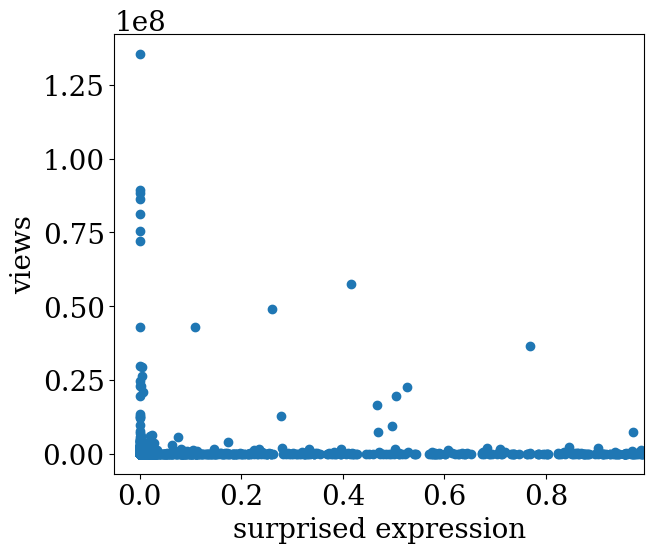

In [ ]:
scag(fed['maxSurprise'], xlabel = "surprised expression", xstep = 0.2)

In [ ]:
boxe(fed['maxAngry'])
boxe(fed['maxDisgust'])
boxe(fed['maxFear'])
boxe(fed['maxHappy'])
boxe(fed['maxSad'])
boxe(fed['maxSurprise'])
boxe(fed['maxNeutral'])

In [ ]:
scag(fed['maxAngry'])
scag(fed['maxDisgust'])
scag(fed['maxFear'])
scag(fed['maxHappy'])
scag(fed['maxSad'])
scag(fed['maxSurprise'])
scag(fed['maxNeutral'])

In [ ]:
scal(fed['maxAngry'])
scal(fed['maxDisgust'])
scal(fed['maxFear'])
scal(fed['maxHappy'])
scal(fed['maxSad'])
scal(fed['maxSurprise'])
scal(fed['maxNeutral'])

In [ ]:
boxe(fed['faceCount'])
boxe(fed['faceCover'])

In [ ]:
boxe(fed['maxAngry'])
boxe(fed['maxDisgust'])
boxe(fed['maxFear'])
boxe(fed['maxHappy'])
boxe(fed['maxSad'])
boxe(fed['maxSurprise'])
boxe(fed['maxNeutral'])

# Ignore

In [ ]:
Xs = Final[['title len2','anticipation','trust','face neutral']]
Ys = Final['views']
print("linear regression importances")
importances = mutual_info_classif(Xs,Ys)
for i in range(len(importances)):
  importances[i] *= 100.0
print(importances)
print("")

Xs = Final[['vidlen','tmb_size','title len1','title len2','anticipation','trust','face cover','face count']]
Ys = Final['strong video']
print("logistic regression importances")
importances = mutual_info_classif(Xs,Ys)
for i in range(len(importances)):
  importances[i] *= 100.0
print(importances)
print("")



linear regression importances
[ 0.  32.5  0.   0. ]

logistic regression importances
[2.56773388 0.         2.24708593 3.10558269 6.31555216 1.24184547
 0.         2.71394138]



---------
RGB EXTRACTION
----------

In [ ]:
# insert library for color harmony if there is .
# if i don't get library then maybe make formula from theory
# https://neilmcinnes.com/colour-notes-on-the-relationships-of-contrasts-and-harmonies/

In [ ]:
!pip install color-harmony

In [ ]:
tmbcol = RAW['tmblink']

In [ ]:
import colorsys
import numpy as np
from collections import Counter
from PIL import ImageCms, ImageColor
from urllib.error import HTTPError
# ----------------------------------------------------------

# deleting the top and bottom of the image becaue image has black rectangle barrriers on top and below
left = 0
right = 480
top = 44
bottom = 315

# ----------------------------------------------------------

# threshold for color difference
color_difference_threshold = 100

# Checking euclidean distance between two colors to get different colors
def color_difference(c1, c2):
    return np.sqrt((c1[0] - c2[0]) ** 2 + (c1[1] - c2[1]) ** 2 + (c1[2] - c2[2]) ** 2)

# create a function to check if a color is significantly different from other colors
def is_color_different(color, other_colors):
    for other_color in other_colors:
        if color_difference(color, other_color) < color_difference_threshold:
            return False
    return True

# crate a pandas df to format the output
imgdf = pd.DataFrame(columns=['Image Url', 'RGB Value 1', 'RGB Value 2', 'RGB Value 3', 'RGB Value 4', 'RGB Value 5',  'Harmony Score'])

# Define a function to convert CMYK to RGB because the image gives me error if extracting RGB directly

def cmyk_to_rgb(c, m, y, k):
    r = int(max(0, min(255, 255 * (1 - c / 100) * (1 - k / 100))))
    g = int(max(0, min(255, 255 * (1 - m / 100) * (1 - k / 100))))
    b = int(max(0, min(255, 255 * (1 - y / 100) * (1 - k / 100))))
    return (r, g, b)

# Main function

for link in tmbcol:
  try:
    urllib.request.urlretrieve(link, 'img.jpg')
  except:
    print(f"HTTPError occurred while retrieving image from URL: {link}")
    continue

  img = Image.open('img.jpg')
  cropped_image = img.crop((left, top, right, bottom))

  img_cmyk = cropped_image.convert('CMYK')

  pixels = list(img_cmyk.getdata())

  color_count = Counter(pixels)

  most_different_colors = []

  complementary_colors = []

  for color in pixels:
    c,m,y,k = color
    rgb = cmyk_to_rgb(c,m,y,k)
    if is_color_different(rgb, most_different_colors):
      most_different_colors.append(rgb)
      if len(most_different_colors) == 5:
        break

  for color in most_different_colors:
    complementary_color = (255 - color[0], 255 - color[1], 255 - color[2])
    complementary_colors.append(complementary_color)

  harmony_scores = []
  for i, color in enumerate(most_different_colors):
    complementary_color = complementary_colors[i];
    harmony_score = 0
    for j, other_color in enumerate(most_different_colors):
      if i != j:
        distance = color_difference(complementary_color, other_color)
        harmony_score +=distance
    harmony_scores.append(harmony_score)

  harmony_score_total = [sum(harmony_scores)]

  # Append the harmony scores to the row list
  row = [link] + most_different_colors + harmony_score_total

  # Add the row to the DataFrame
  try:
    imgdf.loc[len(imgdf)] = row
  except:
    imgdf.loc[len(imgdf)] = imgdf.loc[len(imgdf)-1]

  # Printing phase
  # print(f"\nFor image {link}, the 5 most different colors are:")

  # UnComment to show picture
  img_cmyk.show()
  print("")


  # loop through all img

  for color in most_different_colors:
    im = Image.new('RGB', (10, 10), (color[0], color[1], color[2]))
    print(f"RGB({color[0]}, {color[1]}, {color[2]})")

    # UnComment to show the color of the RGB value
    im.show()
    print("")

In [ ]:
print(len(row))
print(len(imgdf.columns))

7
7


In [ ]:
# imgdf == Pandas Dataframe buat Image URL + 5 colors (color pallete) *Succesfully completed array of unique pictures
# display(imgdf.head())

# Johannes Itten Theory of color harmony?

meanvalue = imgdf['Harmony Score'].mean()
print("Mean:",meanvalue)
print("Max:",imgdf['Harmony Score'].max())
print("Min:",imgdf['Harmony Score'].min())

# imgdf['Harmony Score'] = np.where(imgdf['Harmony Score'] > 4574.037266504805 , 0, 1)
display(imgdf)

In [ ]:
evacuate(imgdf['Harmony Score'], 'ColorHarmony')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
harmony_score_values = imgdf['Harmony Score']

# Plotting the distribution of harmony scores
plt.figure(figsize=(8, 6))
plt.hist(harmony_score_values, bins=20, color='green')
plt.xlabel('Harmony Score')
plt.ylabel('Frequency')
plt.title('Distribution of Harmony Scores')
plt.grid(True)
plt.show()


In [ ]:
boxe(imgdf['Harmony Score'])